# Машинное обучение. ВМК МГУ

## Практическое задание 4: Линейные модели классификации и регрессии


### Важно! О формате сдачи

* Практически все выделенные задания из ноутбука оцениваются по системе кросс-рецензирования. Задания, в котором надо реализовать свой код и послать в систему, выделены здесь и в pdf отдельно
* В этом ноутбуке есть задание на unit-тестирование
* При решении ноутбука используйте данный шаблон. Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно
* Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).
* Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.

А также..

Если в ячейке написана фраза "Вывод"/"Ответ на вопрос" итд, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано "Your code here", то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст)

Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Научиться работать с разными типами признаков;
* Понять, чем отличаются разные регуляризаторы;
* Приятно провести осенний вечер, предсказывая дождь.

При выполнении данного задания необходимо последовательно запустить все ячейки ноутбука и ответить на $20$ вопросов. Ответы на вопросы будут проверены в рамках кросс-ревью. Всего за ответы на вопросы можно получить $30$ баллов.

### *Примерное время выполнения всех ячеек ноутбука: 30 минут*

##Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий нажмите на кнопку Restart runtime, которая появится в следующей ячейке после завершения ее выполнения.

После перезапуска **(restart runtime)** устанавливать библиотеки еще раз не нужно, достаточно проверить, что установилась их новая версия.

На скачивание файла и установку понадобится не более 5 минут.

**Важно!** 
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!**
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то предлагаем вам завести виртуальное окружение и установить в нем библиотеки из файла requirements.txt по ссылке https://drive.google.com/file/d/1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR/view?usp=sharing В таком случае виртуальное окружение достаточно настроить всего один раз.

In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR
! pip install -r /content/requirements.txt

**Нажмите на кнопку <font color='red'>Restart runtime</font>, которая появилась в выводе ячейки сверху после завершения ее выполнения.**

**После перезапуска (restart runtime) устанавливать библиотеки еще раз не нужно, достаточно проверить, что установилась их новая версия.**

In [2]:
import matplotlib
assert(matplotlib.__version__ == '3.5.3')

Теперь можно приступать к выполнению задания! :)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

### Часть 0. Юнит-тестирование (20 баллов)

Ниже импортируются классы, которые необходимо реализовать самостоятельно. Правильность реализации проверяется юнит-тестами. Максимально за юнит-тесты можно получить $20$ баллов. Шаблон для классов находится в отдельной вкладке. 

**После того, как вы локально реализовали и протестировали модуль Task.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки. Будьте внимательны, по окончании сессии хранилище очистится -- вам нужно будет заново загрузить соответствующие модули**

**<font color=red>Обратите внимание!</font>** Если Ваша реализация счётчиков работает очень долго (скажем, больше 2 секунд: можно посмотреть в системе, сколько оно тестировалось), то вероятнее всего, Вы плохо векторизовали код, и ваш ноутбук, перед вопросом 19, будет долго работать. Попробуйте использовать np.vectorize



In [4]:
from Task import MyOneHotEncoder, SimpleCounterEncoder, FoldCounters

### Часть 1. Линейная регрессия

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

Для обучения линейной регрессии, равно как и для обучения остальных простых моделей (линейные модели, решающие деревья, knn и т.д.) отлично подходит библиотека scikit-learn (sklearn): в ней очень понятный и простой интерфейс.

Однако для обучения более сложных моделей вроде бустинга и нейронных сетей всё же нужно пользоваться специализированными библиотеками: XGBoost, LightGBM, CatBoost и пр. для градиентного бустинга над деревьями, PyTorch, Tensorflow и пр. для нейронных сетей. 

Так как мы будем обучать линейную регрессию, нам подойдет реализация из sklearn. В sklearn есть несколько классов, реализующих линейную регрессию. Основные это:

- Ridge — линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией
- Lasso — линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией

Также есть SVR, ElasticNet  и пр., но не будем сегодня о них

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Рассмотрим, модельные данные для задачи регрессии. Пусть $x$ будет обычным числом из равномерного распределения, а $y = 0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim \mathcal{N}(0, 0.01)$.

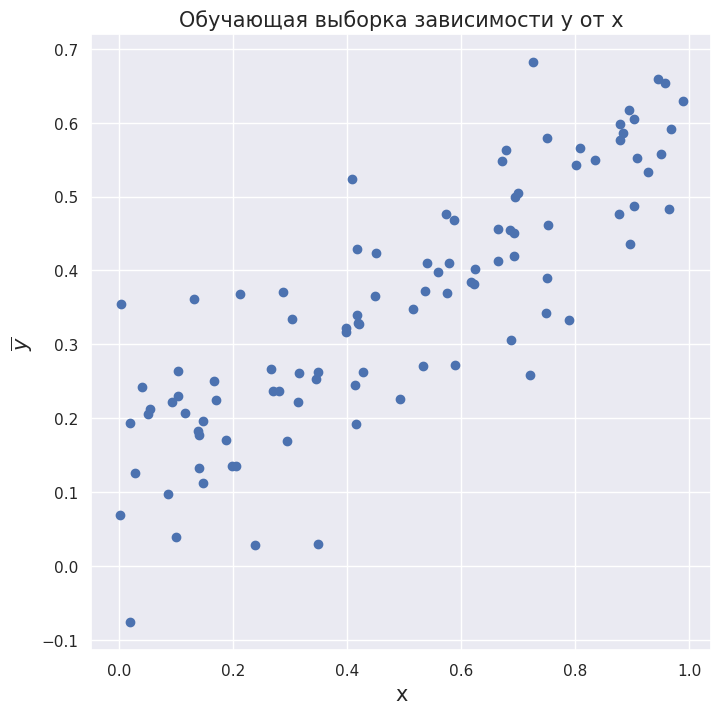

In [5]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

Обучим линейную регрессию, и посмотрим как регуляризация влияет на качество модели. В реализации библиотеки sklearn коэффициент регуляризации задаётся параметром alpha

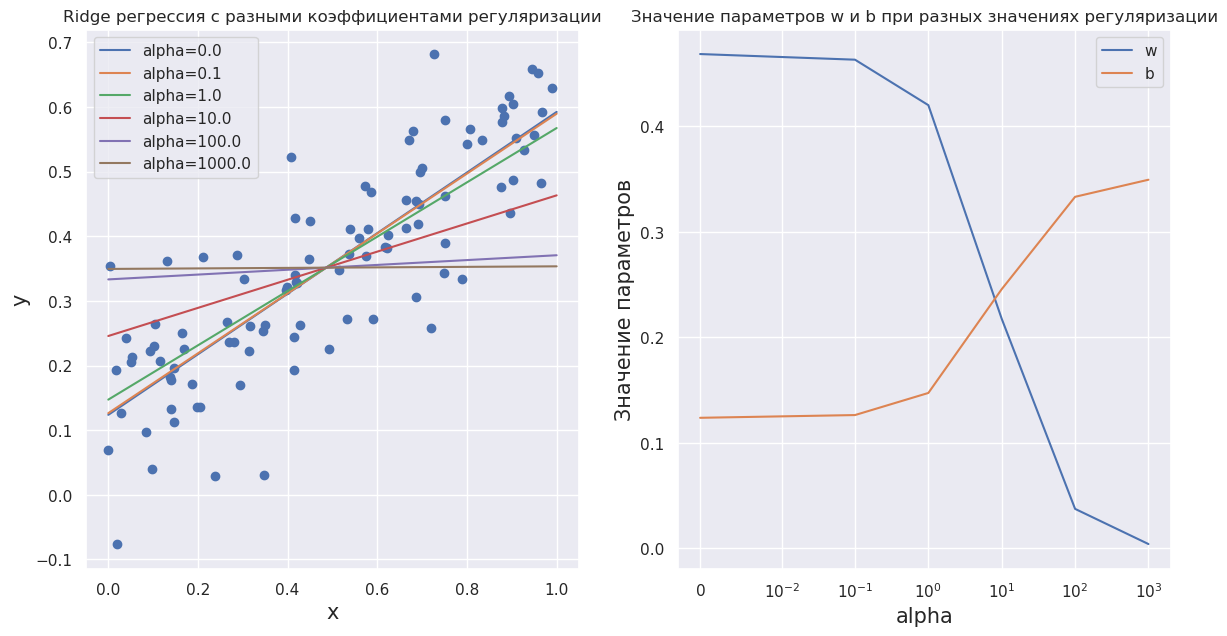

In [6]:
from sklearn.linear_model import Ridge

x_axis = np.linspace(0, 1, 200)
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].scatter(X, Y)

w = []
b = []

alphas = [0.0, 0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X[:, None], Y)
    pred = reg.predict(x_axis[:, None])
    w.append(reg.coef_[0])
    b.append(reg.intercept_)
    axs[0].plot(x_axis, pred, label="alpha=" + str(alpha))

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации")
axs[1].plot(alphas, w, label="w")
axs[1].plot(alphas, b, label="b")
axs[1].set_xlabel("alpha", size=15)
axs[1].set_ylabel("Значение параметров", size=15)
axs[1].set_title("Значение параметров w и b при разных значениях регуляризации")
axs[1].set_xscale("symlog", linthresh=0.01)
axs[1].legend()
plt.show()

**Вопрос 1** (1 балл): Как зависят параметры модели от константы регуляризации? А качество?

**Вопрос 2** (1 балл): Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции и увиденные картинки.

1) Видно, что при увеличении коэффицента регуляризации параметры модели w уменьшаются(в начале постепенно, затем резко, потом ассимптотично стремятся к 0), а b увеличивается(сначала медленно, потом резко, а затем ассимптотично)

2) В наших данных появляется фиктивный признак 1 и коэффицент перед ним равен b(наша разделяющая гиперплоскость это <w,x> + b), при вычисленнии градиента константа обращается в ноль(так как производная равна нулю), поэтому он не поддается регуляризации

Казалось бы, зачем нам эта глупая регуляризация?! 

Давайте рассмотрим ещё один модельный пример. Представим, что кто-то добавил в данные к переменной $x$ её же умноженную на $2$. То есть, теперь у нас два признака $x_1$ и $x_2 = 2 \cdot x_1$. Тогда, $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{4} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. Это может привести к тому, что без регуляризации мы рискуем выучить очень большие веса!

In [11]:
np.random.seed(1)
X2 = np.hstack((X[:, None], 2 * X[:, None]))
Y2 = X2[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X2, Y2)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.1006220738265918 	w2: 0.20124414765318363


Коэффициенты адекватные, хотя и не похожи на изначальную зависимость. Но что, если $x_2$ будет равняться $3 \cdot x_1$?

In [12]:
np.random.seed(1)
X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 20443435586638.348 	w2: -6814478528879.28


Тут вот уже не повезло. Коэффициенты случайно выучились неадекватно большими. Создадим обучающую выборку из того же распределения и посмотрим на качество

In [13]:
np.random.seed(2)
X3_test = np.random.uniform(0, 1, 100)
X3_test = np.hstack((X3_test[:, None], 3 * X3_test[:, None]))
Y3_test = X3_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y3_test_pred = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss: %.4f" % np.mean((Y3_test_pred - Y3_test) ** 2))

MSE loss: 0.0209


Вроде бы неплохое, но что если мы добавим ко второму признаку одного из объектов небольшой шум?

In [14]:
X3_test[0, 1] = X3_test[0, 1] + 1e-10
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y3_test_pred_noisy - Y3_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y3_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y3_test_pred[0])

MSE loss: 4641.705892708396
Предсказание для первого объекта с шумом:  -681.02734375
Предсказание для первого объекта без шума:  0.419921875


Как видим, даже небольшое изменение в данных, приводит к резкому падению качества.

**Вопрос 3** (2 балл) Рассмотрите больше примеров с двумя признаками $x_1$ и $x_2$, где $x_2$ линейно зависит от $x_1$. Убедитесь, что линейная модель без регуляризации крайне неустойчива.

In [20]:
print('Рассмотрим еще 2 примера без регуляризации')
print('Первый для линейной комбинации 3x + 2')
print('А второй для 1000x + 100')
print()
np.random.seed(2)
X3_test_own = np.random.uniform(0, 100, 100)
X3_test_own = np.hstack((X3_test_own[:, None], 3 * X3_test_own[:, None] + 2))
Y3_test_own = X3_test_own[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

model1 = Ridge(alpha=0.0)
model1.fit(X3_test_own, Y3_test_own)

X3_test[0, 1] = X3_test[0, 1] + 1e-10
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print('1 эксперимент:')
print("MSE loss:", np.mean((Y3_test_pred_noisy - model1.predict(X3_test)) ** 2))
print("w1:", model1.coef_[0], "\tw2:", model1.coef_[1])

print()

print('2 эксперимент:')
X3_test_own = np.random.uniform(0, 1, 100)
X3_test_own = np.hstack((X3_test_own[:, None], 1000 * X3_test_own[:, None] + 100))
Y3_test_own = X3_test_own[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

model2 = Ridge(alpha=0.0)
model2.fit(X3_test_own, Y3_test_own)

X3_test[0, 1] = X3_test[0, 1] + 1e-10
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y3_test_pred_noisy - model2.predict(X3_test)) ** 2))
print("w1:", model2.coef_[0], "\tw2:", model2.coef_[1])

Рассмотрим еще 2 примера без регуляризации
Первый для линейной комбинации 3x + 2
А второй для 1000x + 100

1 эксперимент:
MSE loss: 7.453546968028527e+21
w1: -129500890737.71666 	w2: 43166963579.40582

2 эксперимент:
MSE loss: 6.0347027768598045e+23
w1: 1256414387259.257 	w2: -1256414387.2588294


Теперь добавим регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

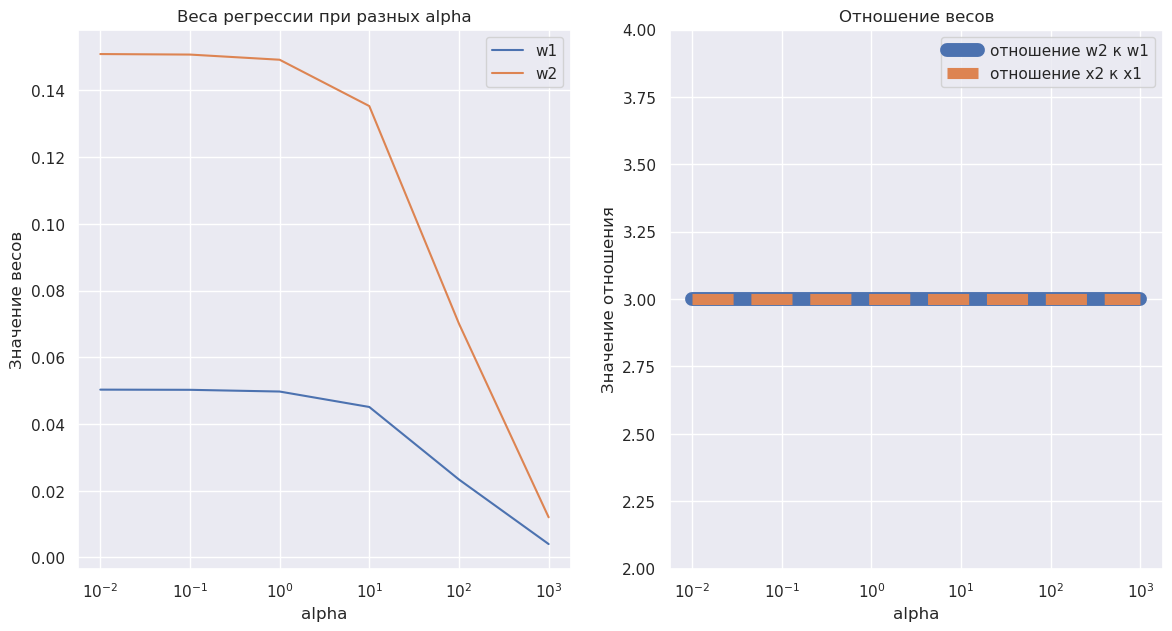

In [21]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])
    
w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2,4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

**Вопрос 4** (2 балла) Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

Рассмотрим более частный случай с возможностью обобщения на более общий и движение к минимизации функции потерь:

Loss = (1/2)(yi - w0 - w1x1 - w2x2)^2 + lambda*(w1^2 + w2^2)

dLoss/dw1 = -x1(yi - w0 - w1x1 - w2x2) + lambda2w1 = 0

dLoss/dw2 = -x2(yi - w0 - w1x1 - w2x2) + lambda2w2 = 0

x1(yi - w0 - w1x1 - w2x2) = lambda2w1

x2(yi - w0 - w1x1 - w2x2) = lambda2w2

откуда получим w1/x1 = w2/x2 = const = (yi - w0 - w1x1 - w2x2)/(2*lambda)

или

w1/w2 = x1/x2

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

**Вопрос 5** (2 балла) Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

Рассмотрим более частный случай с возможностью обобщения на более общий и движение к минимизации функции потерь:

Loss = (1/2)(yi - w0 - w1x1 - w2x2)^2 + lambda*(|w1| + |w2|)

dLoss/dw1 = -x1(yi - w0 - w1x1 - w2x2) + lambda*sgn(w1) = 0

dLoss/dw2 = -x2(yi - w0 - w1x1 - w2x2) + lambda*sgn(w2) = 0

x1(yi - w0 - w1x1 - w2x2) = lambda*sgn(w1)

x2(yi - w0 - w1x1 - w2x2) = lambda*sgn(w2)

x1sgn(w2) = sgn(w1)x2

А так как у нас линейно зависимые признаки => многие веса будут зануляться

Добавим $l1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [22]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.03950662786303303

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.15488377352619098

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1664214880925068

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1675752595491384

Веса, при alpha = 0.00001
w1: 0.4261538129756522 	w2: 0.025639365702917725



**Вопрос 6** (2 балл) Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

**Подсказка** Обратите внимание на то, каким странным получился вес $w_2$

Так как при добавлении коэффицента регуляризации мы начинаем штрафовать слишком большие веса и чем больше alpha, тем больше коэффицентов стремится к 0, тогда при небольшом alpha наши коэффиценты наоборот начинают принимать какие-то значения

Попробуем обучить линейную регрессию c $l_1$ регуляризацией на специальном датасете из sklearn

In [23]:
from sklearn.datasets import fetch_california_housing

In [24]:
X, y = fetch_california_housing(return_X_y=True)
X_train, y_train, X_test, y_test = X[:10000], y[:10000], X[10000:], y[10000:]

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
reg = Lasso(alpha=0.1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

Test MSE = 0.6847


Проанализируем ошибку на обучающей выборке.

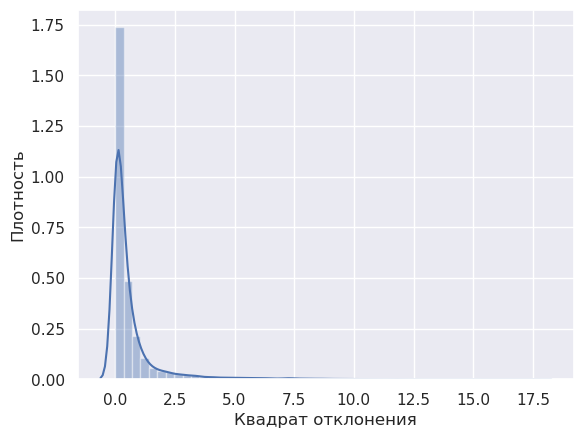

In [27]:
error = (y_train - reg.predict(X_train)) ** 2
sns.distplot(error)
plt.xlabel("Квадрат отклонения")
plt.ylabel("Плотность")
plt.show()

Как видно, есть несколько объектов, на которых модель ошибается сильно. Давайте удалим их из обучающей выборки.

In [28]:
mask = (error < np.quantile(error, 0.99))
reg.fit(X_train[mask], y_train[mask])
y_pred = reg.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred))

Test RMSE = 0.6756


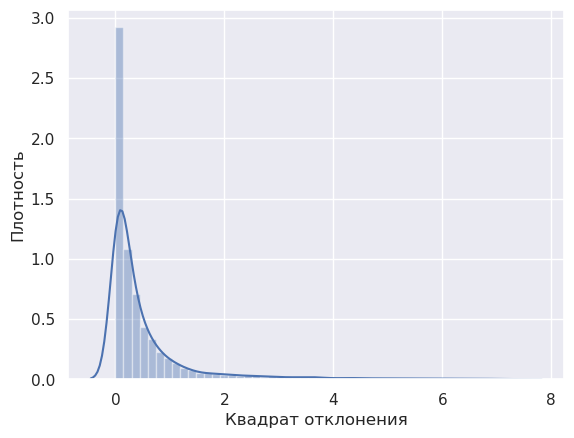

In [29]:
error = (y_train[mask] - reg.predict(X_train[mask])) ** 2
sns.distplot(error)
plt.xlabel("Квадрат отклонения")
plt.ylabel("Плотность")
plt.show()

Таким образом, можно улучшить качество линейной регрессии, если удалить из обучающей выборки выбросы. В данном примере, качество улучшилось не так сильно, но бывают ситуации, когда чистка обучающей выборки по ошибке, приводит к сильному улучшению качества.

Также обратим внимание на веса модели. Часть из них занулилось. Это большое преимущество, так как разреживание весов позволяет отбирать нужные признаки, делая модель более лёгкой.

In [30]:
reg.coef_

array([ 4.02918974e-01,  1.28178142e-02, -0.00000000e+00,  0.00000000e+00,
        4.53555975e-05, -6.81173164e-03, -7.58947693e-02, -0.00000000e+00])

А теперь обучим с $l_2$ регуляризацией.

In [31]:
reg = Ridge(alpha=1)
reg.fit(X_train, y_train)
print(reg.coef_)

[ 4.51549218e-01  5.12533532e-03 -1.19136586e-01  6.66014972e-01
 -5.48001331e-06 -7.24339954e-03 -4.43125173e-01 -3.91587744e-01]


Как видим, веса не разрежены, хотя и есть очень маленькие значения

**Вопрос 7** (2 балл) Приведите пример, когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак?

Такого невозможно(все веса стремятся к 0, но не станут равными 0), так как из прошлого мы показали, что отношение сохраняется при l2 регуляризации, и равенство 0 весового коэффицента возможно только если сам признак равен 0, но это значит, что либо его можно принять за фиктивный признак, либо он является линейной комбинацией других

### Часть 2. Классификация

Напомним, что бинарная линейная классификация с классами $0$ и $1$ &mdash; это модель следующего вида:
$a(x)= \begin{cases}
1, & \langle w, x \rangle + b > 0; \\
0, & \text{иначе.}
\end{cases}$
 
где  $w \in \mathbb{R}^d$,  $b \in \mathbb{R}$. В логистической регрессии $p(x) = \frac{1}{1 + e^{-a(x)}}$ интерпретируется как вероятность принадлежности к первому классу. Если объект $x$ принадлежит классу $1$ с вероятностью $p(x)$, то правдоподобие записывается в виде $\prod_{i=1}^{n} p(x_i)^{y_i} \cdot \left( 1 - p(x_i) \right)^{1 - y_i}$. Обучить логистическую регрессию означает найти параметры $w$ и $b$, которые максимизируют указанное правдоподобие. Что эквивалентно минимизации $- \sum_{i=1}^n y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i))$. Указанная функция потерь называет логистической (или логлосс).

По тем же причинам, что и в линейной регрессии, к логистической функции потерь добавляется регуляризация (стандартно это $l_2$).

Рассмотрим пару модельных примеров, в которых целевая переменная $y$ линейно зависит от двух независимых величин $x_1$ и $x_2$, плюс случайный шум.

In [32]:
np.random.seed(1)
X = np.random.randn(100, 2)
Y = np.random.randn(100) * 1. + X[:, 0] * 3 - X[:, 1] * 0.12
Y = np.where(Y > 0, 1, 0)

Обучим логистическую регрессию, двумя методами LBFGS и Newton-CG. Для простоты восприятия, можно считать, что первый похож на градиентный спуск, а второй на метод Ньютона

In [33]:
from sklearn.linear_model import LogisticRegression

clf_lbfgs = LogisticRegression(C=1, solver='lbfgs', max_iter=1, warm_start=True, fit_intercept=False)
clf_newton_cg = LogisticRegression(C=1, solver='newton-cg', max_iter=1, warm_start=True, fit_intercept=False)

coefs_lbfgs = []
coefs_nc = []

for it in range(1000):
    clf_lbfgs.fit(X, Y)
    coefs_lbfgs.append(clf_lbfgs.coef_[0])
    clf_newton_cg.fit(X, Y)
    coefs_nc.append(clf_newton_cg.coef_[0])
    
coefs_lbfgs = np.array(coefs_lbfgs)
coefs_nc = np.array(coefs_nc)

In [34]:
x1 = np.linspace(0.5, 3.5, 1000)
x2 = np.linspace(-0.5, -0.1, 1000)
X1, X2 = np.meshgrid(x1, x2)

def loss(X1, X2, X, Y):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    p = sigmoid(X1[None] * X[:, 0, None, None] + X2[None] * X[:, 1, None, None]) # 100, 200, 200
    return -np.sum(Y[:, None, None] * np.log(p) + (1 - Y[:, None, None]) * np.log(1 - p), axis=0) + 0.5 * (X1**2 + X2**2)

Z = loss(X1, X2, X, Y)

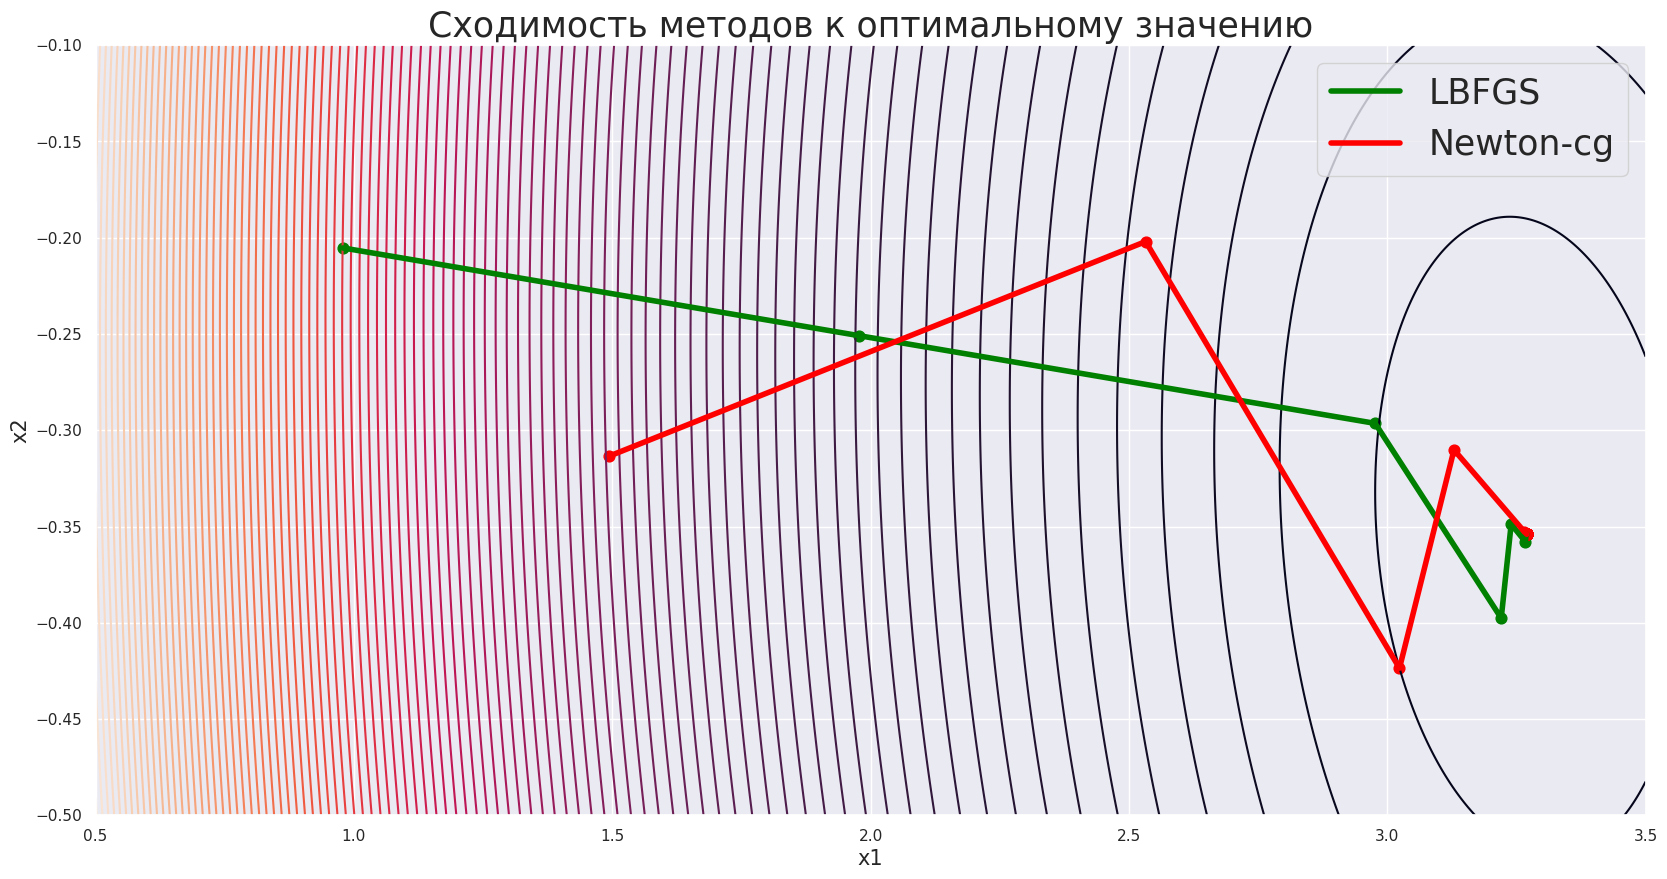

In [35]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.contour(X1, X2, Z, levels=100)
plt.plot(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", linewidth=4, label="LBFGS")
plt.scatter(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", s=60)
plt.plot(coefs_nc[:, 0], coefs_nc[:, 1], color="red", linewidth=4, label="Newton-cg")
plt.scatter(coefs_nc[:, 0], coefs_nc[:, 1], color="red", s=60)
plt.legend(fontsize=25)
plt.xlabel("x1", size=15)
plt.ylabel("x2", size=15)
plt.title("Сходимость методов к оптимальному значению", size=25)
plt.show()

Рассмотрим второй пример. Внимание, здесь $x_2$ уже из другого распределения! 

In [36]:
np.random.seed(1)
X = np.hstack((np.random.randn(100, 1), np.random.uniform(7, 12, (100, 1))))
Y = np.random.randn(100) * 1. + X[:, 0] * 3 - X[:, 1] * 0.12
Y = np.where(Y > 0, 1, 0)

In [37]:
clf_lbfgs = LogisticRegression(C=1, solver='lbfgs', max_iter=1, warm_start=True, fit_intercept=False)
clf_newton_cg = LogisticRegression(C=1, solver='newton-cg', max_iter=1, warm_start=True, fit_intercept=False)

coefs_lbfgs = []
coefs_nc = []

for it in range(1000):
    clf_lbfgs.fit(X, Y)
    coefs_lbfgs.append(clf_lbfgs.coef_[0])
    clf_newton_cg.fit(X, Y)
    coefs_nc.append(clf_newton_cg.coef_[0])
    
coefs_lbfgs = np.array(coefs_lbfgs)
coefs_nc = np.array(coefs_nc)

x1 = np.linspace(0, 3.5, 1000)
x2 = np.linspace(0.01, -0.1, 1000)
X1, X2 = np.meshgrid(x1, x2)
Z = loss(X1, X2, X, Y)

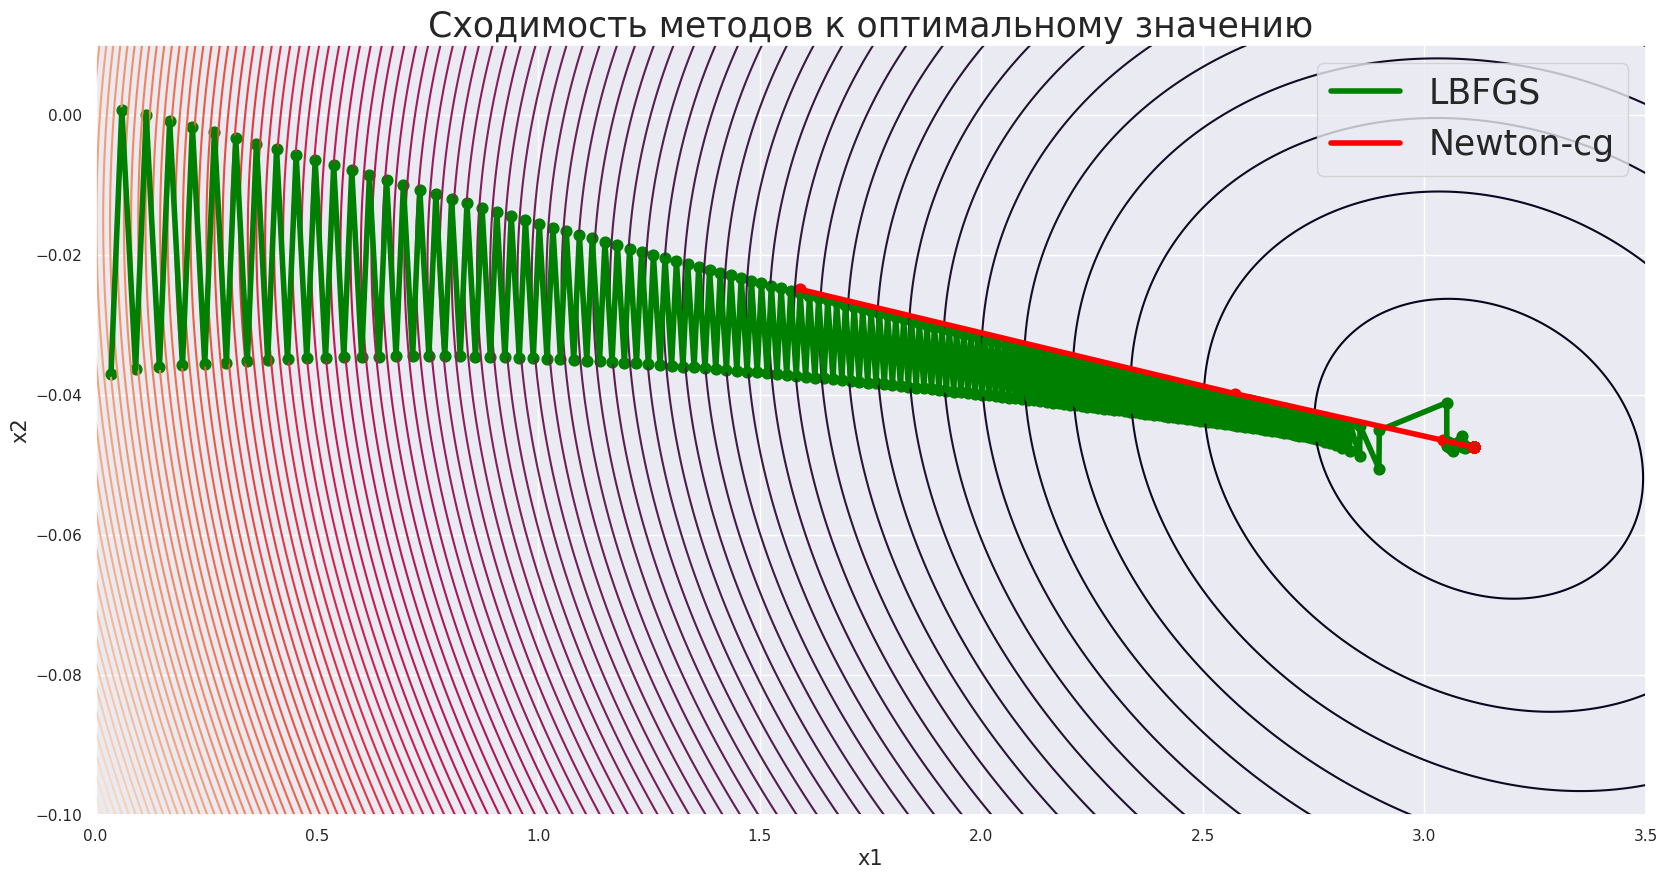

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.contour(X1, X2, Z, levels=100)
plt.plot(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", linewidth=4, label="LBFGS")
plt.scatter(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", s=60)
plt.plot(coefs_nc[:, 0], coefs_nc[:, 1], color="red", linewidth=4, label="Newton-cg")
plt.scatter(coefs_nc[:, 0], coefs_nc[:, 1], color="red", s=60)
plt.legend(fontsize=25)
plt.xlabel("x1", size=15)
plt.ylabel("x2", size=15)
plt.title("Сходимость методов к оптимальному значению", size=25)
plt.show()

**Вопрос 8** (2 балл) Как видим, метод LBFGS плохо работает на неотмасштабированных данных. Это общее свойство всех методов первого порядка (т.е. использующих только первую производную). Ньютоновские же методы хорошо справляются с подобными ситуациями. В таком случае, почему LBFGS является методом по умолчанию, а не Newton-CG?

Так как этот метод менее ресурснозатратный как по времени(мы вычисляем лишь 1 проивзодную вместо 2 в методе Ньютона), так и по памяти

#### Обучение на реальных данных

Рассмотрим набор данных от метеорологической службы одной страны. В нём требуется предсказать, будет ли дождь на следующий день.

Для начала, скачаем данные

In [ ]:
!gdown 1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe

Downloading...

From: https://drive.google.com/uc?id=1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe

To: /content/weatherAUS.csv

100% 14.1M/14.1M [00:00<00:00, 87.2MB/s]


In [39]:
df = pd.read_csv("/kaggle/input/ausdataset/AusDataForRainPred.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Вопрос 9** (1 балл) Что это за страна? Подсказка: жители этой страны воспользовались бы методом tail вместо head :)

Австралия

Извлечём немного информации из набора данных

In [40]:
df.shape

(145460, 23)

In [41]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Внимательно приглядимся к столбцам. Напомним, что мы предсказываем значение RainTomorrow. Давайте посмотрим, на этот столбец

In [42]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

Целевая переменная содержит неопределённые значения! Их нужно удалить из всей выборки. Также, переименуем 'Yes' и 'No' в $1$ и $0$.

In [43]:
df = df[df['RainTomorrow'] == df['RainTomorrow']]
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1., 'No': 0.})
df['RainToday'] = df['RainToday'].map({'Yes': 1., 'No': 0.})

In [45]:
print(df.shape)

(142193, 23)


Объектов стало чуть-чуть поменьше. Давайте выведем немного информации о них

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Как видим, у нас есть 17 признаков имеющих вещественные значения (вещественные признаки), и 5 признаков типа object (категориальные признаки). Для них требуется отдельная предобработка. Пока разобьём выборку на обучающую и тестовую.

In [47]:
from sklearn.model_selection import train_test_split

<img src="https://img.devrant.com/devrant/rant/r_2416968_UUKQJ.jpg" width=360 height=760 />

In [48]:
y = df.RainTomorrow
X = df.drop(columns=["RainTomorrow"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [49]:
X_train.shape

(99535, 22)

#### Вещественные признаки

Как вы могли заметить, среди вещественных и категориальных признаков есть пропущенные значения. В случае с вещественными признаками, пропущенные значения заполняют средним, медианой, нулём или даже пытаются предсказывать по другим признакам. Мы заполним медианой

In [50]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_median = numeric_data.median()
numeric_features = numeric_data.columns
X_train = X_train.fillna(numeric_data_median)
X_test = X_test.fillna(numeric_data_median)

In [51]:
len(numeric_features)

17

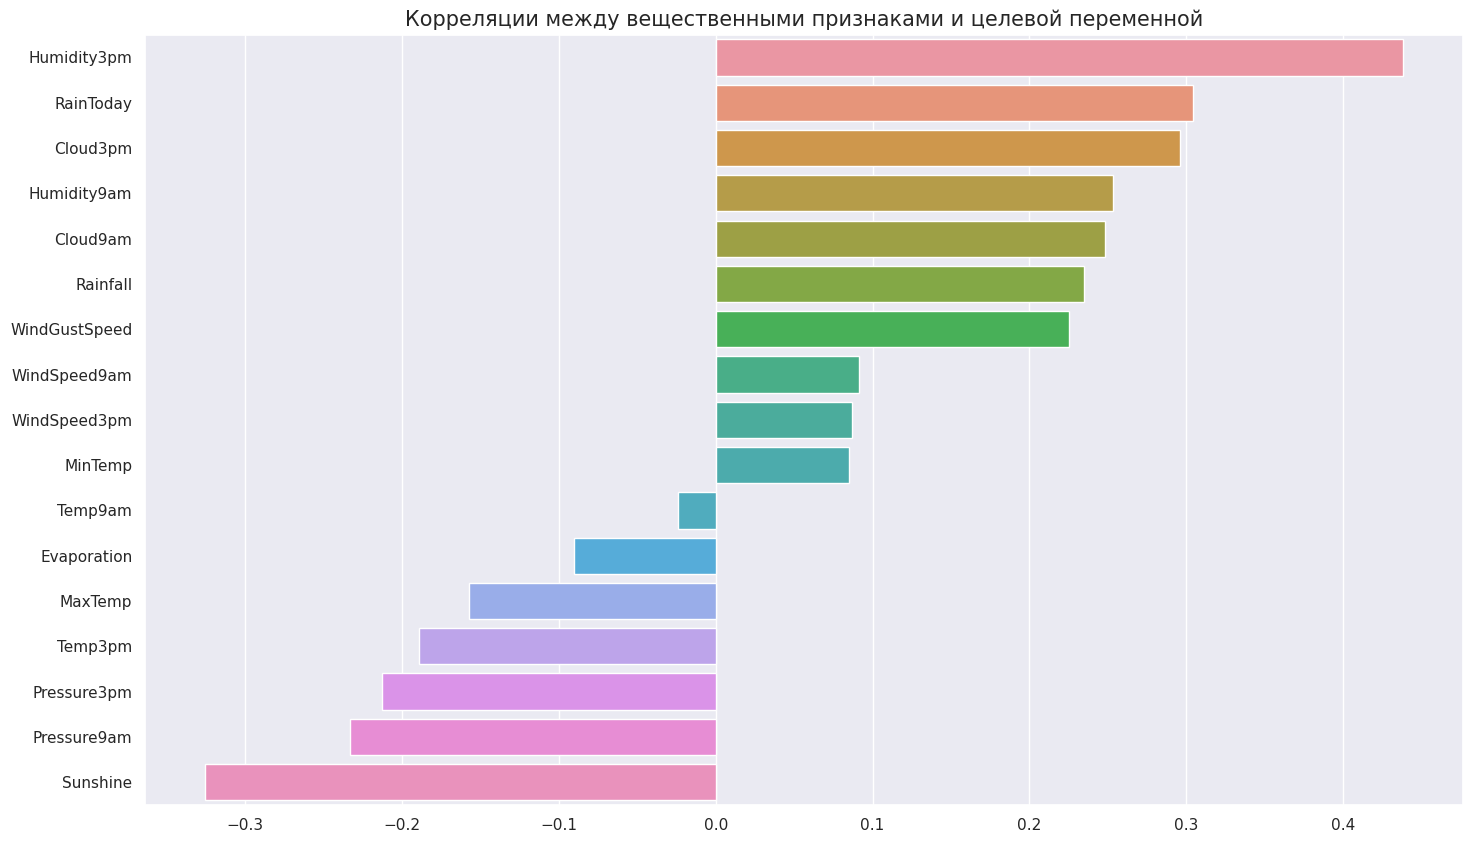

In [52]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title("Корреляции между вещественными признаками и целевой переменной", size=15)
plot.figure.set_size_inches(17, 10)

**Вопрос 10** (1 балл) Попробуйте объяснить для каких-нибудь признаков получившиеся значения корреляции (почему для одних эти значения высокие, а для других низкие)?

Так как одни признаки являются более важными при составлении прогноза(при повышенной влажности велика вероятность дождя), а другие являются не такими важными(например, температура в 9 часов утра)

Дополнительно визуализируем признаки Sunshine и Humidity3pm. Библиотека seaborn предоставляет график swarmplot, который в отличие от scatterplot старается разместить на графике как можно больше точек, так чтобы они не пересекались, уложившись при этом в заданную ширину.

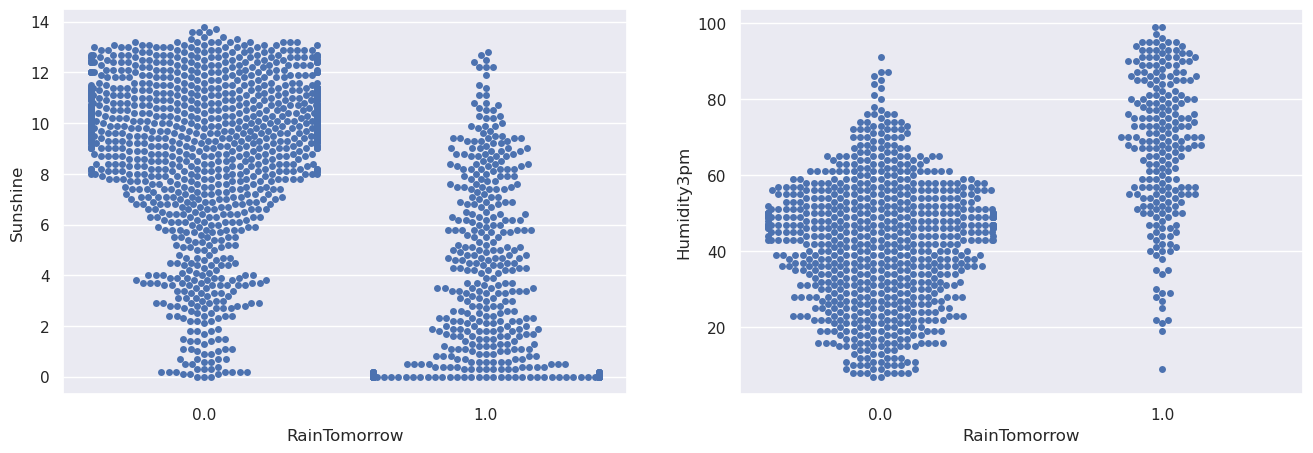

In [53]:
fig, axs = plt.subplots(figsize=(16, 5), nrows=1, ncols=2)
_ = sns.swarmplot(x="RainTomorrow", y="Sunshine", data=df.head(10000), ax=axs[0])
_ = sns.swarmplot(x="RainTomorrow", y="Humidity3pm", data=df.head(1000), ax=axs[1])

Для оценки качества классификации воспользуемся реализованными в sklearn logloss и ROC AUC. ROC AUC является метрикой по умолчанию для бинарной классификации, поскольку очень устойчива к несбалансированности классов. Подробнее про неё можно прочитать https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/ . Обучим  логистическую регрессию на вещественных признаках, не подбирая константу регуляризации

In [54]:
from sklearn.metrics import log_loss, roc_auc_score

In [55]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train[numeric_features], y_train)

LogisticRegression(max_iter=1000)

In [56]:
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
y_train_pred = model.predict_proba(X_train[numeric_features])[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3651
Train logloss = 0.3689
Test roc auc score = 0.8588
Train roc auc score = 0.8570


**Вопрос 11** (1 балл) Сколько итераций понадобилось для обучения логистической регрессии?

590

In [57]:
int(model.n_iter_)

590

Выведем гистограмму обученных весов

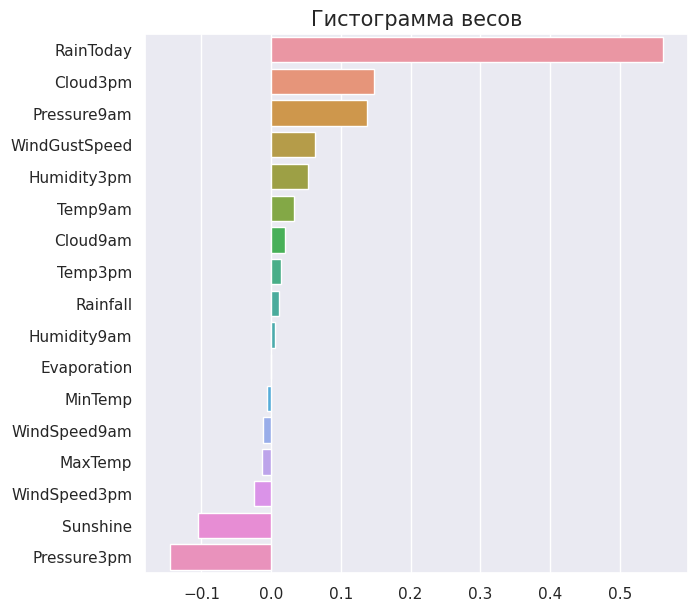

In [58]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

Если приглядеться к весам, то можно увидеть, что между корреляциями признаков с целевой переменной и значениемя соответствующих весов мало общего. Чтобы это предотвратить, будем масштабировать наши признаки перед обучением модели. Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени.

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

In [60]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

**Вопрос 12** (2 балл) А сколько итераций потребовалось теперь? Как это связано с модельным примером?

Потребовалось всего 33 итерации, то есть мы улучшили сходимость, кроме того, теперь наши веса соотвествуют корреляциям

In [61]:
int(model.n_iter_)

33

In [62]:
y_pred = model.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model.predict_proba(X_train_scaled)[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3592
Train logloss = 0.3636
Test roc auc score = 0.8646
Train roc auc score = 0.8625


**Вопрос 13** (2 балл) Сравните получившееся качество с качеством до нормализации. Объясните, почему оно изменилось, хотя мы применяли линейную модель к линейно преобразованным признакам? Могло ли качество измениться в другую сторону?

Старое значение

Test logloss = 0.3650

Train logloss = 0.3689

Test roc auc score = 0.8588

Train roc auc score = 0.8571

Качество модели улучшилось, так как мы отмасштабировали все признаки и дали им одну степень важности. Регуляризация же улучшила сходиомсть, так как всем признакам мы придали одну единую шкалу, с которой регуляризация работает лучше. Качество модели могло и ухудшиться, так как при приведении мы могли потерять какую-то важную информацию.

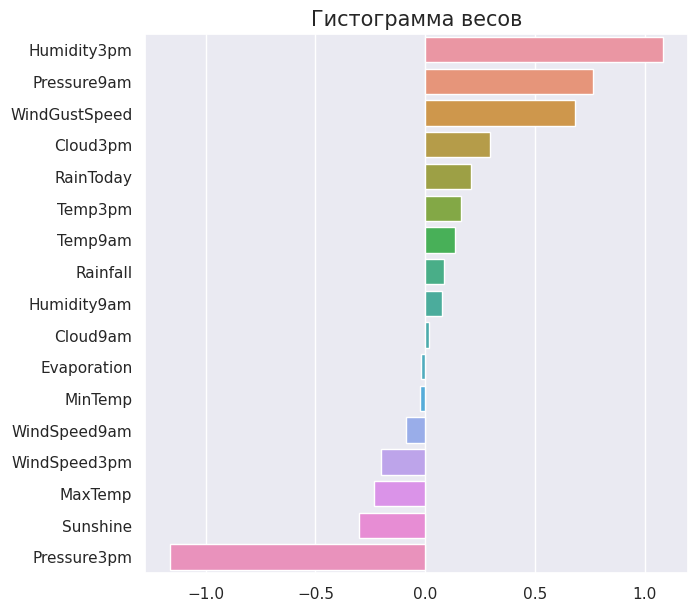

In [63]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

**Вопрос 14** (1 балл) Почему даже после нормализации график не до конца похож на гистограмму корреляций?

Модель пытается сопоставить признакам с большим значением корреляции большие веса, однако наиболее значимые признаки не обязательно должны сильно коррелировать с целевой переменной, так как модель может найти другую зависимость или причинно-следственную связь.

Наряду с параметрами (веса $w$, $w_0$), которые модель оптимизирует на этапе обучения, у модели есть и гиперпараметры. У нашей модели это alpha — коэффициент регуляризации. Подбирают его обычно по сетке, измеряя качество на валидационной (не тестовой) выборке или с помощью кросс-валидации. Посмотрим, как это можно сделать (заметьте, что мы перебираем alpha по логарифмической сетке, чтобы узнать оптимальный порядок величины).

**Вопрос 15** (1 балл) Чем отличаются валидационная и тестовая выборки?

Валидационная выборка нужна для подобора гиперпараметров, а тестовая нужна для финальной оценки качества нашей модели.

Best C = 38.8816


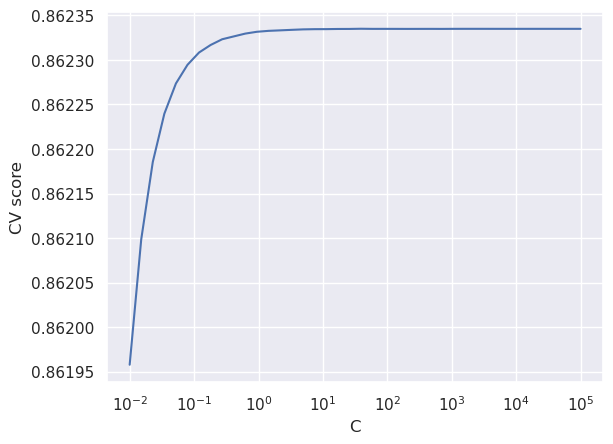

In [64]:
from sklearn.model_selection import GridSearchCV

C = np.logspace(-2, 5, 40)
searcher = GridSearchCV(LogisticRegression(solver='lbfgs'), [{"C": C}], scoring="roc_auc", cv=10)
searcher.fit(X_train_scaled, y_train)

best_C = searcher.best_params_["C"]

print("Best C = %.4f" % best_C)

_ = plt.plot(C, searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("CV score")
plt.show()

**Вопрос 16** (1 балл) Почему с ростом $C$ качество не падает, хотя модель должна недообучаться?

**Подсказка**: Внимательно прочитайте документацию к реализации логистической регрессии в sklearn

Так как С - это коэффицент обратный коэффиценту регуляризации, то при увеличении С коэффицент регуляризации уменьшается, следовательно недообучения быть не может, так как слишком большие веса штрафуются несильно.

**Вопрос 17** (2 балла) Почему мы не подбираем коэффициент регуляризации по обучающей выборке? По тестовой выборке?

На обучающей выборки модель будет стараться минимизировать функцию потерь, то есть она просто примет коэффицент регуляризации равным 0. Если мы будет менять его по тестовой выборке, то это будет не совсем корректно с точки зрения постановки задачи, ведь на тестовой выборке мы просто оцениваем качество получившейся модели и не более

Попробуем обучить модель с подобранным коэффициентом регуляризации. Заодно воспользуемся удобным классом Pipeline: обучение модели часто представляется как последовательность некоторых действий с обучающей и тестовой выборками (например, сначала нужно отмасштабировать выборку (причем для обучающей выборки нужно применить метод fit, а для тестовой — transform), а затем обучить/применить модель (для обучающей fit, а для тестовой — predict). Pipeline позволяет хранить эту последовательность шагов и корректно обрабатывает разные типы выборок: и обучающую, и тестовую. Однако, если ваши модели не укладываются в использование простых fit, transform и predic, то этот класс вам не подойдёт

In [65]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', LogisticRegression(solver='lbfgs', C=best_C))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3592
Test roc auc score = 0.8646


**Вопрос 18** (2 балла) Почему качество не выросло?

Так как по качеству best_C близок к дефолтному параметру С=1

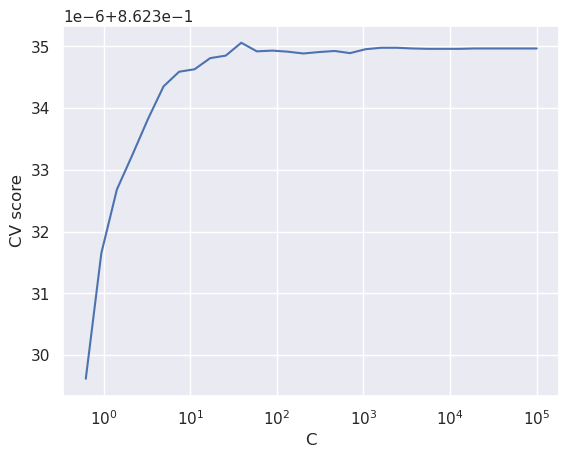

In [66]:
_ = plt.plot(C[10:], searcher.cv_results_["mean_test_score"][10:])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("CV score")
plt.show()

Рассмотрим теперь категориальные признаки. Сразу отметим, что признак "Date" очень опасен, и лучше пока его выкинуть. Это связано с тем, что мы можем получить прямую о том, будет ли завтра дождь, если текущее место и завтрашняя дата встречались где-то в обучающей выборке. Очень часто также встречаются признак наподобие "ID", которые могут содержать аналогичные утечки информации. С такими признаками всегда нужно обращаться осторожно!

In [67]:
categorical = list(X_train.drop(columns=["Date"]).dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

Для работы с категориальными признаками нужно их как-то закодировать числами. Для этого нам понадобится заранее реализованный class MyOneHotEncoder. Вообще OneHotEncoding &mdash; самая стандартная процедура для кодирования категориальных признаков. Помимо библиотеки sklearn, встроенный OneHotEncoder есть в библиотеке pandas и называется get_dummies. Однако сегодня мы не будем пользоваться библиотечными методами:)

Если последующий код выполнятеся слишком медленно, то вероятно Вы реализовали MyOneHotEncoder без использования векторных операций из библиотеки numpy. Попробуйте метод numpy.vectorize

In [68]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', MyOneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('classification', LogisticRegression(solver='lbfgs', max_iter=200))
])

model = pipeline.fit(X_train.drop(columns=["Date"]), y_train)
y_pred = model.predict_proba(X_test.drop(columns=["Date"]))[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3516
Test roc auc score = 0.8700


Качество немного выросло, если смотреть на ROC AUC!

Давайте попробуем счётчики.

Напомним, что счётчики преобразуют категориальный признак в три значения:

1. Доля counts объектов в обучающей выборке с таким же значением признака. $$\begin{align}
successes_j(c) = \frac{1}{n} \sum_{i=1}^n [f_j(x_i) = c]
\end{align}$$
2. Доля successes объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака. $$\begin{align}
counts_j(c) = \frac{1}{n * counts_j(c)} \sum_{i=1}^n[f_j(x_i) = c][y_i = +1].
\end{align}$$
2. Сглаженное отношение двух предыдущих величин: $$\begin{align}
p_j(c) = \frac{successes_j(c) + a}{counts_j(c) + b},
\end{align}$$

**Обратите внимание!** Если Ваша реализация счётчиков работает очень долго, то вероятнее всего, Вы плохо векторизовали код. Попробуйте использовать np.vectorize

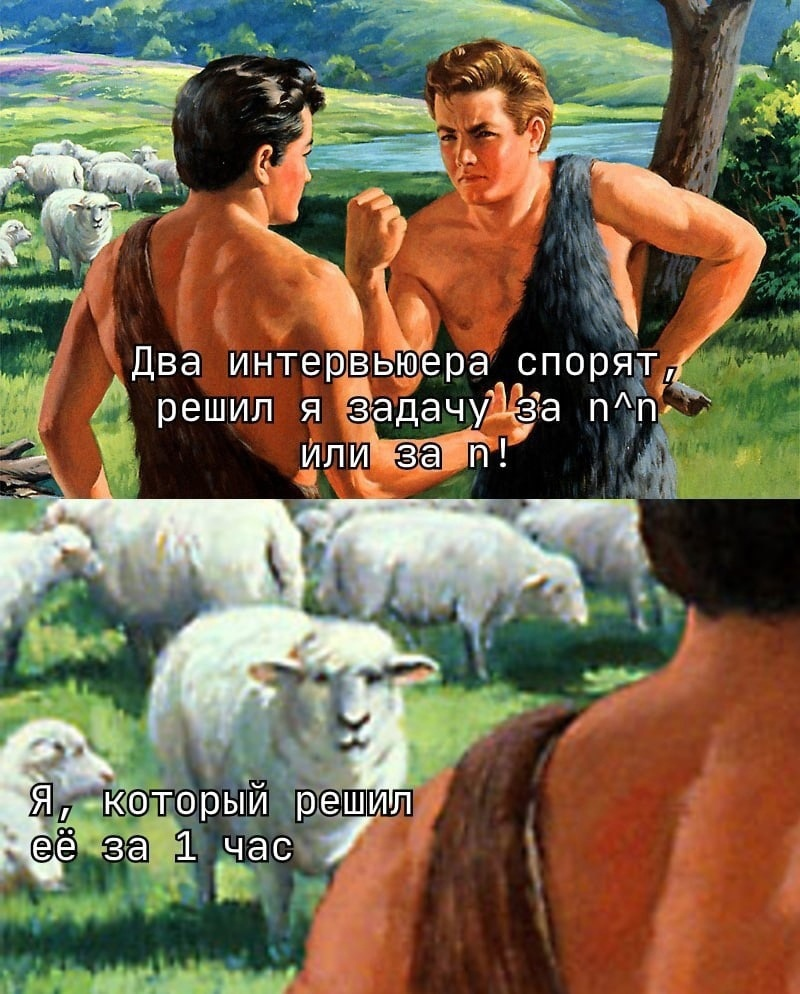

In [69]:
scal = StandardScaler()

enc_train = FoldCounters()
enc_train.fit(X_train[categorical], y_train)
X_train_counters = enc_train.transform(X_train[categorical])

enc_test = SimpleCounterEncoder()
enc_test.fit(X_train[categorical], y_train)
X_test_counters = enc_test.transform(X_test[categorical])

X_train_preprocessed = scal.fit_transform(np.hstack((X_train[numeric_features].to_numpy(), X_train_counters)))
X_test_preprocessed = scal.transform(np.hstack((X_test[numeric_features].to_numpy(), X_test_counters)))

model = LogisticRegression(solver="lbfgs")
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict_proba(X_test_preprocessed)[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3573
Test roc auc score = 0.8665


**Вопрос 19** (1 балл) Счётчики показывают худшее качество по AUC ROC, нежели OneHotEncoding. В чём же преимущества счётчиков?

Счетчики хранят матрицы более компактно, нежеле OneHotEncoding, который может делать матрицы большого размера



**Вопрос 20** (1 балл) Можно ли использовать $l_1$ регуляризацию в логистической регрессии?

Да, так как главное, чтобы не было проблем с вычислением градиента, проблему в точке ноль можно решить обособленно, добавив, например, некоторое сглаживание в нашу функцию потерь

**Выводы** Итак, мы научились, применять линейные модели для задач классификации и регрессии. Узнали зачем нужна регуляризация, а также научились преобразовывать входные данные для ускорения обучения линейных моделей, и повышения их качества.